# **Simple Linear Regression**

**Problem Statement:-** What will be predicted score if a student studies for 9.25 hrs/day ?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
student_data = pd.read_csv("http://bit.ly/w-data")
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# Dataset Summary or Information
def data_summary(data):
  print("---------------------------------------------------------------------------------")
  print("The data has {} records and {} columns.".format(data.shape[0],  data.shape[1]))
  print("---------------------------------------------------------------------------------")
  print("The Information of data:", data.info())
  print("---------------------------------------------------------------------------------")
  print("The data description:\n", data.describe())
  print("---------------------------------------------------------------------------------")
  print("The Null Count check on data:\n", data.isnull().sum())
  print("---------------------------------------------------------------------------------")

print(data_summary(student_data))

---------------------------------------------------------------------------------
The data has 25 records and 2 columns.
---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
The Information of data: None
---------------------------------------------------------------------------------
The data description:
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
---------------------------------------------------------------------------------
The Null Count check on

### **Observations**
* We don't have null data.
* Average hours a student studies are 5 hrs.
* Average score a student receives in exams is 51.
* According to data, maximum hours a student studies are 9 hrs and maximum scores obtained are 95.

# **Data Visualization**

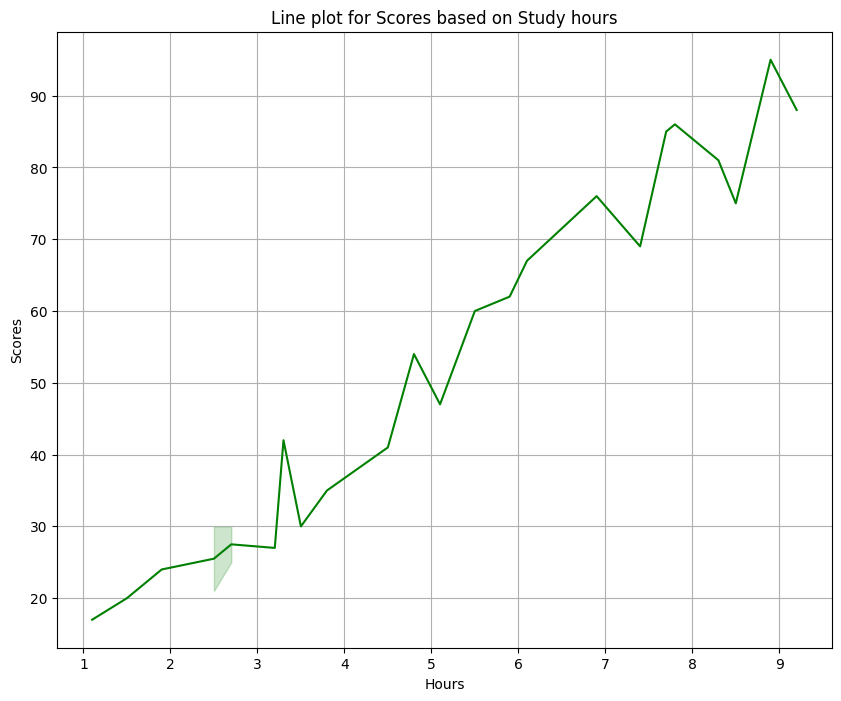

In [ ]:
plt.figure(figsize=[10,8])
sns.lineplot(data=student_data, x = "Hours", y = "Scores", color='g')
plt.title("Line plot for Scores based on Study hours")
plt.grid()
plt.show()

* It is showing positive linear relationship between study hours and scores.


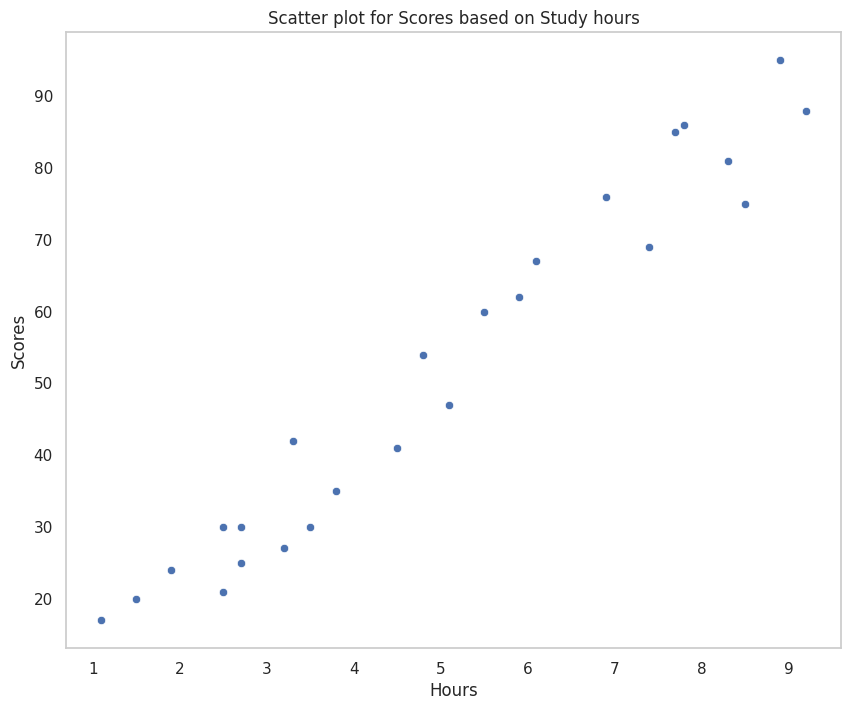

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[10,8])
sns.scatterplot(data=student_data, x = "Hours", y = "Scores")
plt.title("Scatter plot for Scores based on Study hours")
plt.grid()
plt.show()

# **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

X = student_data.drop("Scores", axis=1)
y = student_data['Scores']
# X = s_data.iloc[:, :-1].values
# y = s_data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

# **Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

# Fitting and training our model with data
linear_reg.fit(X_train, y_train)

LinearRegression()

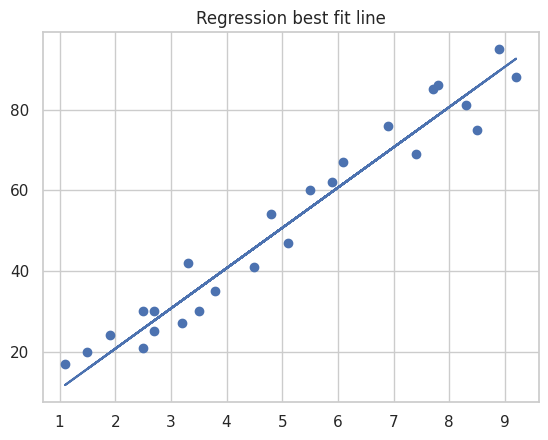

In [ ]:
# Plotting the regression line
line = linear_reg.coef_*X + linear_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Regression best fit line")
plt.show()

In [ ]:
# Predictions
y_pred = linear_reg.predict(X_test) # Predictions

In [ ]:
# Accuracy and Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model_Accuracy = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 25.702454306049937
Mean Absolute Error: 4.588942065491185


In [ ]:
# Lets solve our problem statement
hours = np.array(9.25).reshape(1, -1)
prediction = linear_reg.predict(hours)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [9.25]
Predicted Score = 93.09017632241813
